In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import fbprophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fbprophet

In [ ]:
us1 = pd.read_csv('US1.MSFT_211019_221018.csv')
us1.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.MSFT,D,19/10/21,0,308.33,309.30,307.255,308.33,629007
1,US1.MSFT,D,20/10/21,0,309.27,309.65,306.120,307.48,522745
2,US1.MSFT,D,21/10/21,0,307.17,311.02,306.420,310.65,554301
3,US1.MSFT,D,22/10/21,0,310.51,311.05,307.910,309.10,611199
4,US1.MSFT,D,25/10/21,0,309.36,309.36,306.530,308.27,604132


In [ ]:
df = us1[['<DATE>', '<HIGH>', '<LOW>', '<CLOSE>']]
df.index = pd.to_datetime(df['<DATE>'], dayfirst = True)
df = df.drop('<DATE>', axis = 1)
df

,<HIGH>,<LOW>,<CLOSE>
<DATE>,,,
2021-10-19,309.30,307.255,308.33
2021-10-20,309.65,306.120,307.48
2021-10-21,311.02,306.420,310.65
2021-10-22,311.05,307.910,309.10
2021-10-25,309.36,306.530,308.27
...,...,...,...
2022-10-12,227.85,223.980,225.63
2022-10-13,236.10,219.170,234.31
2022-10-14,237.20,228.350,228.52


In [ ]:
df.isnull().sum()

<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64

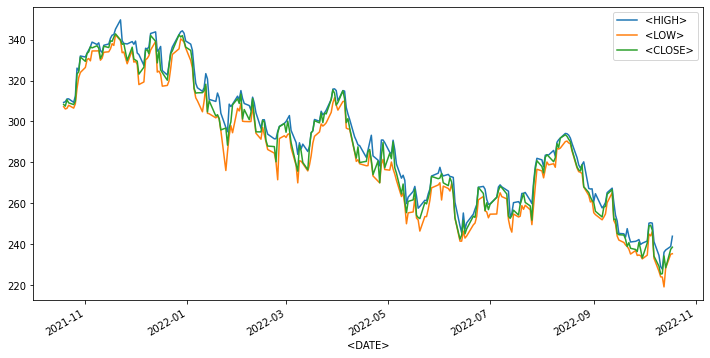

In [ ]:
import matplotlib.pyplot as plt
df['2021-10-19':'2022-10-18'].plot();

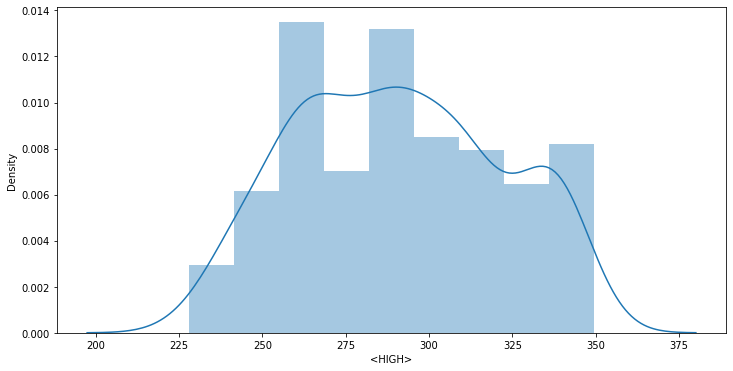

In [ ]:
import seaborn as sns
sns.distplot(df['<HIGH>'])

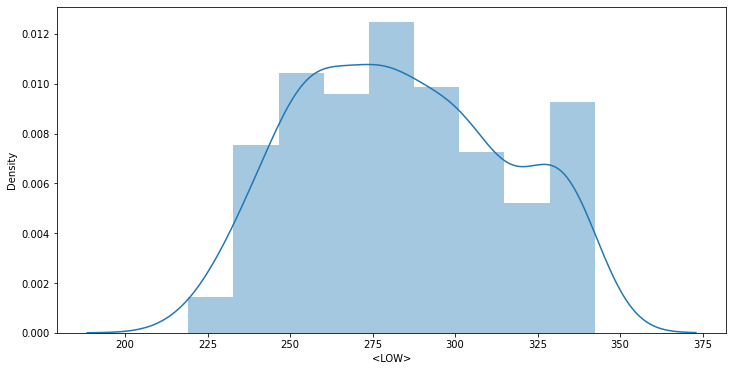

In [ ]:
sns.distplot(df['<LOW>'])

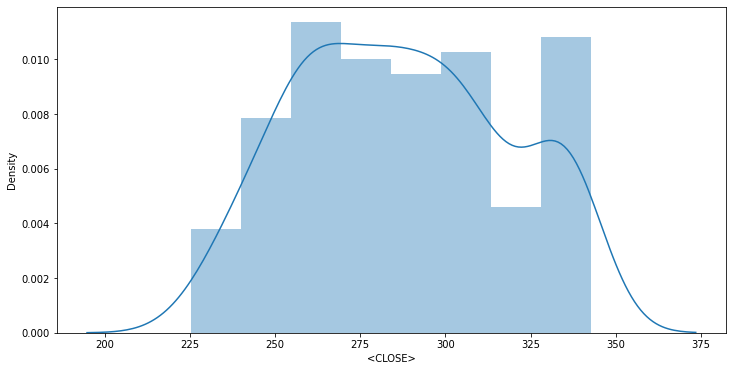

In [ ]:
sns.distplot(df['<CLOSE>'])

In [ ]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday

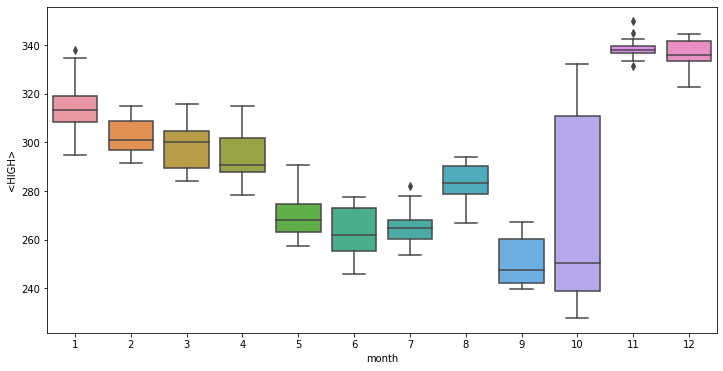

In [ ]:
sns.boxplot(x='month', y='<HIGH>', data=df)

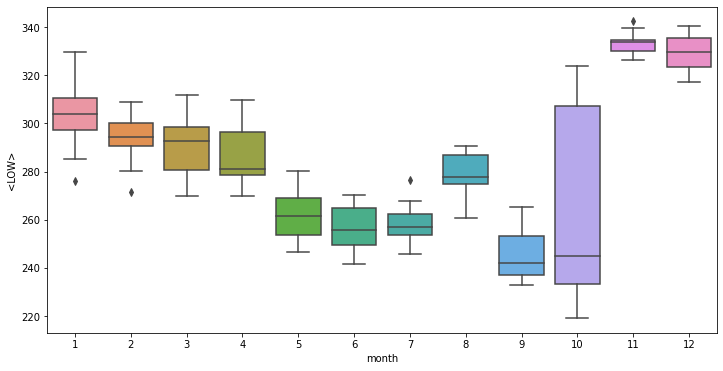

In [ ]:
sns.boxplot(x='month', y='<LOW>', data=df)

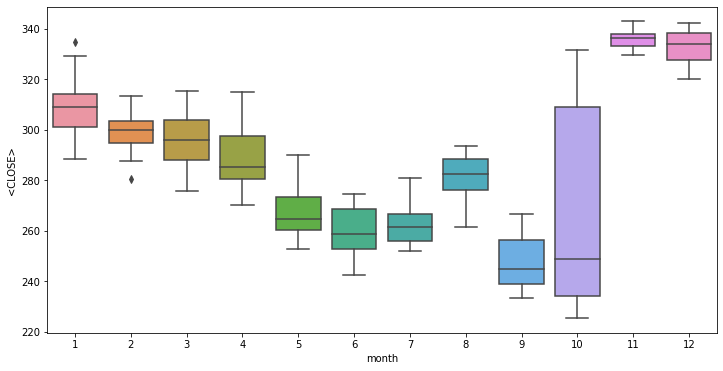

In [ ]:
sns.boxplot(x='month', y='<CLOSE>', data=df)

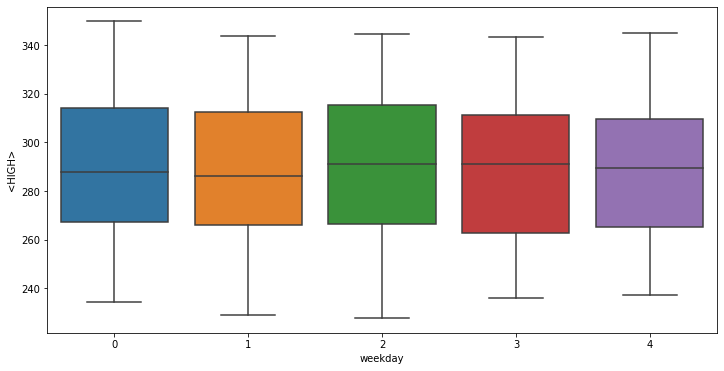

In [ ]:
sns.boxplot(x='weekday', y='<HIGH>', data=df)

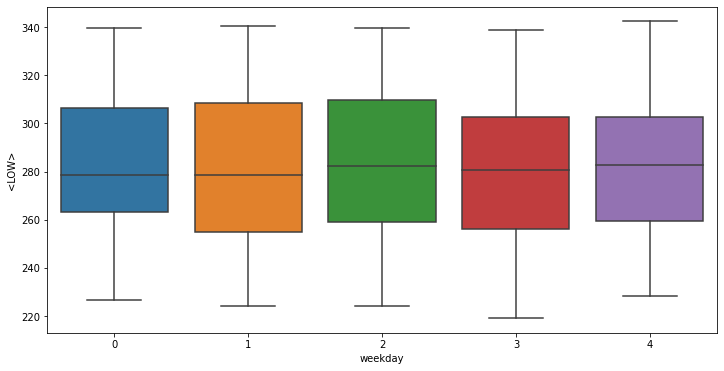

In [ ]:
sns.boxplot(x='weekday', y='<LOW>', data=df)

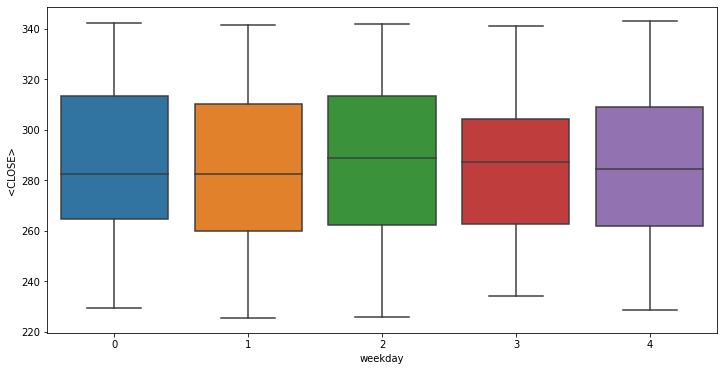

In [ ]:
sns.boxplot(x='weekday', y='<CLOSE>', data=df)

In [ ]:
prophetdf = pd.DataFrame()
prophetdf['ds'] = df.index
prophetdf['y'] = df['<HIGH>'].values

In [ ]:
prophetdf_train = prophetdf[:-15]
prophetdf_test = prophetdf[-15:]

In [ ]:
fbmodel = fbprophet.Prophet(n_changepoints=22, weekly_seasonality=True, changepoint_range=0.1,changepoint_prior_scale=0.5)
fbmodel.fit(prophetdf_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = fbmodel.make_future_dataframe(periods=15, freq='D') # periods = 15, freg = 'D'
fbforecast = fbmodel.predict(future)

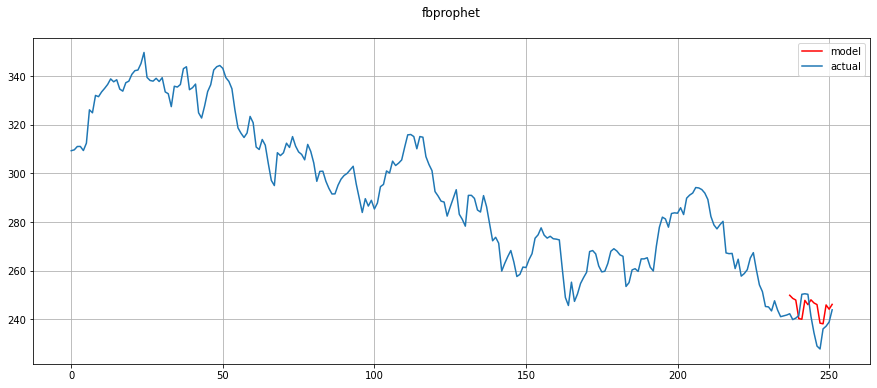

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fbforecast.yhat[-15:], color='r', label="model")
plt.title("fbprophet\n")
plt.plot(prophetdf['y'].values[:], label="actual")

plt.legend()
plt.grid(True)

In [ ]:
from sklearn.metrics import  mean_absolute_error
mean_absolute_error(prophetdf.y[-15:], fbforecast.yhat[-15:])

7.146013228173632

In [ ]:
prophetdf = pd.DataFrame()
prophetdf['ds'] = df.index
prophetdf['y'] = df['<LOW>'].values

In [ ]:
prophetdf_train = prophetdf[:-15]
prophetdf_test = prophetdf[-15:]

In [ ]:
fbmodel = fbprophet.Prophet(n_changepoints=10, weekly_seasonality=True, changepoint_range=0.05,changepoint_prior_scale=1)
fbmodel.fit(prophetdf_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = fbmodel.make_future_dataframe(periods=15, freq='D') # periods = 15, freg = 'D'
fbforecast = fbmodel.predict(future)

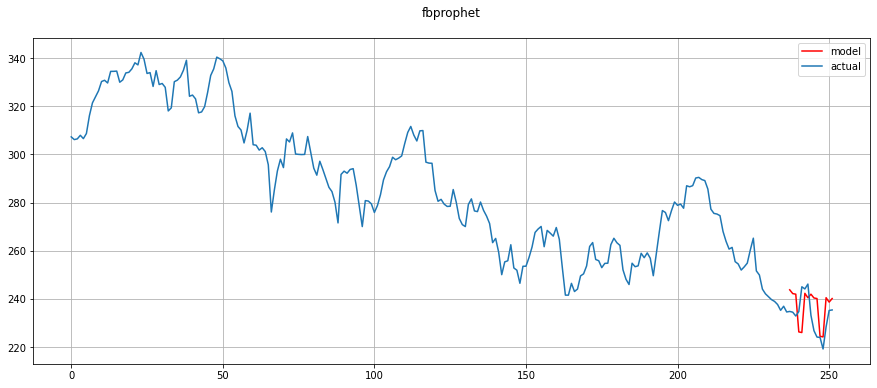

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fbforecast.yhat[-15:], color='r', label="model")
plt.title("fbprophet\n")
plt.plot(prophetdf['y'].values[:], label="actual")

plt.legend()
plt.grid(True)

In [ ]:
mean_absolute_error(prophetdf.y[-15:], fbforecast.yhat[-15:])

8.321797504564179

In [ ]:
prophetdf = pd.DataFrame()
prophetdf['ds'] = df.index
prophetdf['y'] = df['<CLOSE>'].values

In [ ]:
prophetdf_train = prophetdf[:-15]
prophetdf_test = prophetdf[-15:]

In [ ]:
fbmodel = fbprophet.Prophet(n_changepoints=10, weekly_seasonality=True, changepoint_range=0.05,changepoint_prior_scale=1)
fbmodel.fit(prophetdf_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = fbmodel.make_future_dataframe(periods=15, freq='D') # periods = 15, freg = 'D'
fbforecast = fbmodel.predict(future)

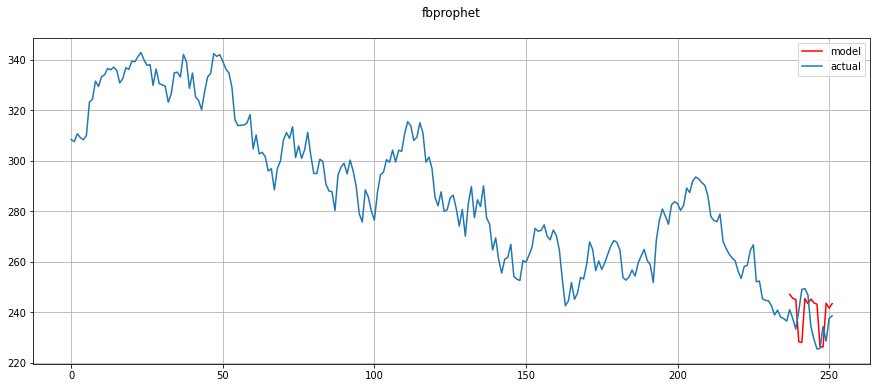

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fbforecast.yhat[-15:], color='r', label="model")
plt.title("fbprophet\n")
plt.plot(prophetdf['y'].values[:], label="actual")

plt.legend()
plt.grid(True)

In [ ]:
mean_absolute_error(prophetdf.y[-15:], fbforecast.yhat[-15:])

9.49398944017936

Экспоненциальное сглаживание

In [ ]:
df1 = us1[['<DATE>', '<HIGH>', '<LOW>', '<CLOSE>']]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# обучаем модель
model = SimpleExpSmoothing(df1['<HIGH>'])
model_fit = model.fit(smoothing_level=0.8)
# строим предсказания
yhat = model_fit.predict(10, len(df1['<HIGH>'])+1)

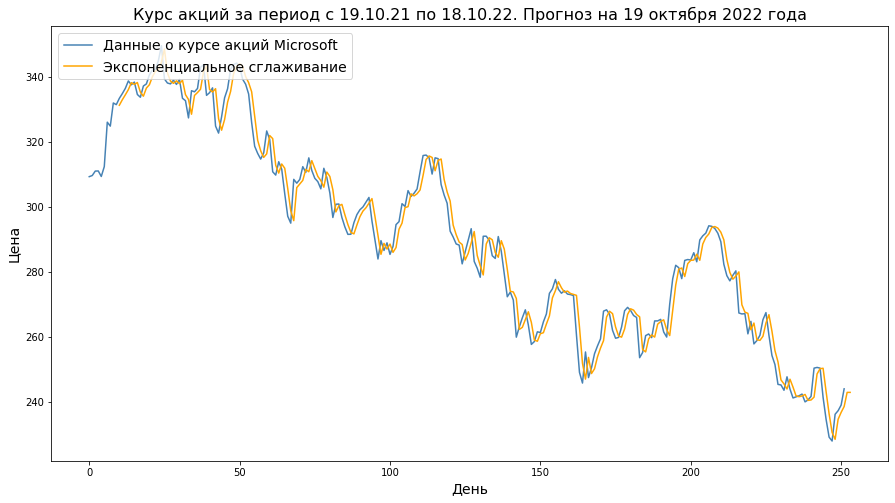

In [ ]:
# посмотрим на результат на графике

# зададим размер
plt.figure(figsize = (15,8))

# выведем данные о курсе акций и кривую экспоненциального сглаживания
plt.plot(df1['<HIGH>'], label = 'Данные о курсе акций Microsoft', color = 'steelblue')
plt.plot(yhat, label = 'Экспоненциальное сглаживание', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.ylabel('Цена', fontsize = 14)
plt.xlabel('День', fontsize = 14)
plt.title('Курс акций за период с 19.10.21 по 18.10.22. Прогноз на 19 октября 2022 года', fontsize = 16)

plt.show()

Модель SARIMAX

In [ ]:
# разобьём данные на обучающую и тестовую выборки

train = df1[:236]
test = df1[237:]

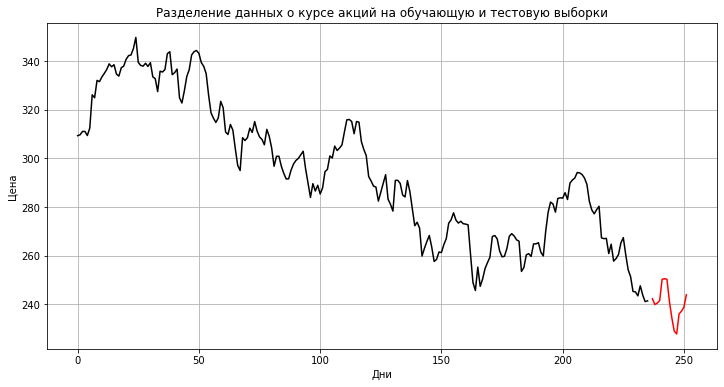

In [ ]:
# выведем эти данные на графике
plt.plot(train['<HIGH>'], color = "black")
plt.plot(test['<HIGH>'], color = "red")

# заголовок и подписи к осям
plt.title('Разделение данных о курсе акций на обучающую и тестовую выборки')
plt.ylabel('Цена')
plt.xlabel('Дни')

# добавим сетку
plt.grid()

plt.show()

In [ ]:
# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 10)

# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train['<HIGH>'],
                order = (3, 0, 0),
                seasonal_order = (0, 1, 0, 12))

# применим метод fit
result = model.fit()

In [ ]:
# мы можем посмотреть результат с помощью метода summary()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             <HIGH>   No. Observations:                  236
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -733.636
Date:                            Thu, 17 Nov 2022   AIC                           1475.272
Time:                                    13:15:55   BIC                           1488.919
Sample:                                         0   HQIC                          1480.781
                                            - 236                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1224      0.077     14.532      0.000       0.971       1.274
ar.L2         -0.2982      0.111   

In [ ]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start, end)
predictions

236    247.948448
237    252.131158
238    246.709093
239    241.853510
240    240.282718
241    235.288724
242    236.116437
243    235.374388
244    240.332640
245    237.270374
246    235.195653
247    236.105677
248    243.145387
249    247.806448
250    242.815093
Name: predicted_mean, dtype: float64

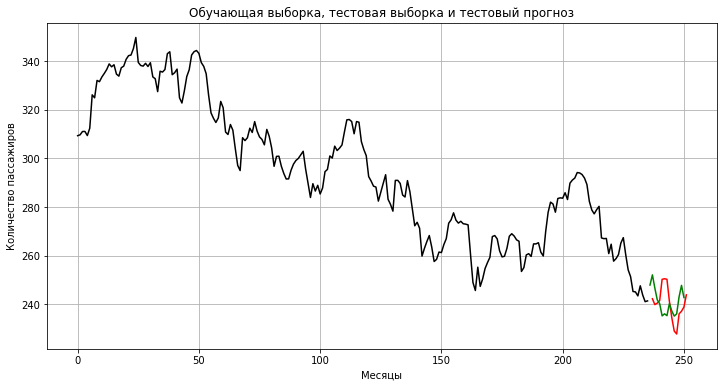

In [ ]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train['<HIGH>'], color = 'black')
plt.plot(test['<HIGH>'], color = 'red')
plt.plot(predictions, color = 'green')

# заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

In [ ]:
mean_absolute_error(test['<HIGH>'], predictions)

7.132068279724234

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
dataset = us1['<HIGH>'].values

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset1 = scaler.fit_transform(dataset.reshape(-1, 1))
len(dataset1)

252

In [ ]:
# split into train and test sets
train_size = int(len(dataset1) * (1 - 15/252))
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size], dataset1[train_size:len(dataset)]
print(len(train), len(test))

237 15


In [ ]:
def create_dataset(dataset2, look_back):
  dataX=[]
  dataY =[]
  for i in range(len(dataset2)-look_back):
    a = dataset2[i:(i+look_back)]
    dataX.append(a)
    dataY.append(dataset2[i + look_back])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back=3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
234/234 - 5s - loss: 0.3353 - 5s/epoch - 19ms/step
Epoch 2/10
234/234 - 1s - loss: 0.1182 - 744ms/epoch - 3ms/step
Epoch 3/10
234/234 - 1s - loss: 0.0889 - 675ms/epoch - 3ms/step
Epoch 4/10
234/234 - 1s - loss: 0.0637 - 810ms/epoch - 3ms/step
Epoch 5/10
234/234 - 1s - loss: 0.0475 - 889ms/epoch - 4ms/step
Epoch 6/10
234/234 - 1s - loss: 0.0431 - 898ms/epoch - 4ms/step
Epoch 7/10
234/234 - 1s - loss: 0.0423 - 962ms/epoch - 4ms/step
Epoch 8/10
234/234 - 1s - loss: 0.0417 - 712ms/epoch - 3ms/step
Epoch 9/10
234/234 - 1s - loss: 0.0407 - 698ms/epoch - 3ms/step
Epoch 10/10
234/234 - 1s - loss: 0.0413 - 753ms/epoch - 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from math import *
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

1/1 [==============================] - 0s 82ms/step


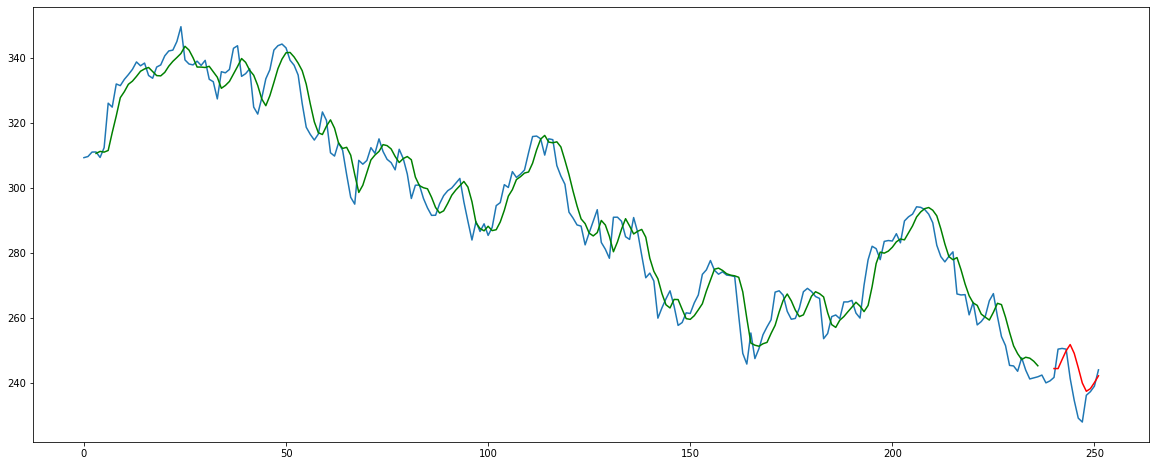

In [ ]:
plt.figure(figsize=(20, 8))
trainPredictPlot = np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset1), :] = testPredict

plt.plot(scaler.inverse_transform(dataset1))
plt.plot(trainPredictPlot, color='g')
plt.plot(testPredictPlot,color='r')
plt.show()

In [ ]:
mean_absolute_error(testY, model.predict(testX))

1/1 [==============================] - 0s 51ms/step


0.04804770939610801